In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r"C:\Users\brito\OneDrive\Documents\DATA_FOLDER\otp_time_series_web.csv")

In [3]:
data.head()

,Route,Departing_Port,Arriving_Port,Airline,Month,Sectors_Scheduled,Sectors_Flown,Cancellations,Departures_On_Time,Arrivals_On_Time,Departures_Delayed,Arrivals_Delayed,Year,Month_Num
0,Adelaide-Brisbane,Adelaide,Brisbane,All Airlines,Jan-04,155.0,155,0.0,123.0,120.0,32.0,35.0,2004,1
1,Adelaide-Canberra,Adelaide,Canberra,All Airlines,Jan-04,75.0,75,0.0,72.0,72.0,3.0,3.0,2004,1
2,Adelaide-Gold Coast,Adelaide,Gold Coast,All Airlines,Jan-04,40.0,40,0.0,36.0,35.0,4.0,5.0,2004,1
3,Adelaide-Melbourne,Adelaide,Melbourne,All Airlines,Jan-04,550.0,548,2.0,478.0,487.0,70.0,61.0,2004,1
4,Adelaide-Perth,Adelaide,Perth,All Airlines,Jan-04,191.0,191,0.0,169.0,168.0,22.0,23.0,2004,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105296 entries, 0 to 105295
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Route               105296 non-null  object 
 1   Departing_Port      105296 non-null  object 
 2   Arriving_Port       105296 non-null  object 
 3   Airline             105296 non-null  object 
 4   Month               105296 non-null  object 
 5   Sectors_Scheduled   105296 non-null  float64
 6   Sectors_Flown       105296 non-null  int64  
 7   Cancellations       104980 non-null  float64
 8   Departures_On_Time  105296 non-null  float64
 9   Arrivals_On_Time    105296 non-null  float64
 10  Departures_Delayed  105291 non-null  float64
 11  Arrivals_Delayed    105296 non-null  float64
 12  Year                105296 non-null  int64  
 13  Month_Num           105296 non-null  int64  
dtypes: float64(6), int64(3), object(5)
memory usage: 11.2+ MB


In [5]:
data.isnull().sum()

Route                   0
Departing_Port          0
Arriving_Port           0
Airline                 0
Month                   0
Sectors_Scheduled       0
Sectors_Flown           0
Cancellations         316
Departures_On_Time      0
Arrivals_On_Time        0
Departures_Delayed      5
Arrivals_Delayed        0
Year                    0
Month_Num               0
dtype: int64

In [6]:
data = data.dropna(subset=['Cancellations'])
data = data.dropna(subset=['Departures_Delayed'])

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 104975 entries, 0 to 105295
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Route               104975 non-null  object 
 1   Departing_Port      104975 non-null  object 
 2   Arriving_Port       104975 non-null  object 
 3   Airline             104975 non-null  object 
 4   Month               104975 non-null  object 
 5   Sectors_Scheduled   104975 non-null  float64
 6   Sectors_Flown       104975 non-null  int64  
 7   Cancellations       104975 non-null  float64
 8   Departures_On_Time  104975 non-null  float64
 9   Arrivals_On_Time    104975 non-null  float64
 10  Departures_Delayed  104975 non-null  float64
 11  Arrivals_Delayed    104975 non-null  float64
 12  Year                104975 non-null  int64  
 13  Month_Num           104975 non-null  int64  
dtypes: float64(6), int64(3), object(5)
memory usage: 12.0+ MB


In [8]:
data.head(10)

,Route,Departing_Port,Arriving_Port,Airline,Month,Sectors_Scheduled,Sectors_Flown,Cancellations,Departures_On_Time,Arrivals_On_Time,Departures_Delayed,Arrivals_Delayed,Year,Month_Num
0,Adelaide-Brisbane,Adelaide,Brisbane,All Airlines,Jan-04,155.0,155,0.0,123.0,120.0,32.0,35.0,2004,1
1,Adelaide-Canberra,Adelaide,Canberra,All Airlines,Jan-04,75.0,75,0.0,72.0,72.0,3.0,3.0,2004,1
2,Adelaide-Gold Coast,Adelaide,Gold Coast,All Airlines,Jan-04,40.0,40,0.0,36.0,35.0,4.0,5.0,2004,1
3,Adelaide-Melbourne,Adelaide,Melbourne,All Airlines,Jan-04,550.0,548,2.0,478.0,487.0,70.0,61.0,2004,1
4,Adelaide-Perth,Adelaide,Perth,All Airlines,Jan-04,191.0,191,0.0,169.0,168.0,22.0,23.0,2004,1
5,Adelaide-Sydney,Adelaide,Sydney,All Airlines,Jan-04,486.0,485,1.0,456.0,465.0,29.0,20.0,2004,1
6,Albury-Sydney,Albury,Sydney,All Airlines,Jan-04,168.0,168,0.0,148.0,146.0,20.0,22.0,2004,1
7,Alice Springs-Sydney,Alice Springs,Sydney,All Airlines,Jan-04,63.0,63,0.0,61.0,63.0,2.0,0.0,2004,1
8,All Ports-All Ports,All Ports,All Ports,All Airlines,Jan-04,31913.0,31685,228.0,27599.0,27475.0,4086.0,4210.0,2004,1
9,Brisbane-Adelaide,Brisbane,Adelaide,All Airlines,Jan-04,155.0,155,0.0,123.0,140.0,32.0,15.0,2004,1


C:\Users\brito\AppData\Local\Temp\ipykernel_21420\4094101628.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Difference'] = abs(filtered_data['Sectors_Scheduled'] - filtered_data['Sectors_Flown'])


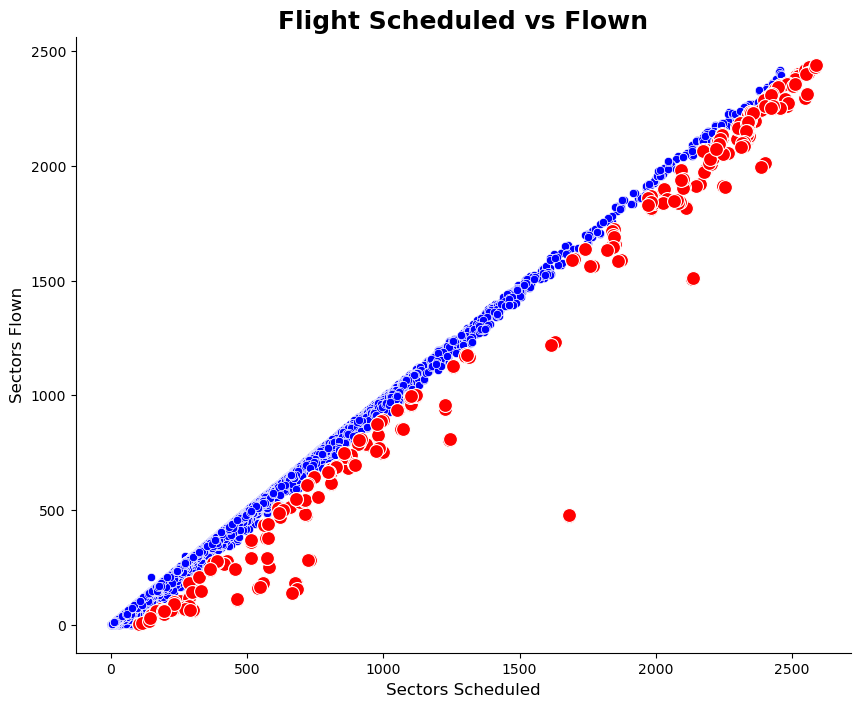

In [9]:
selected_airports = ['Adelaide', 'Brisbane', 'Darwin', 'Hobart', 'Sydney', 'Melbourne', 'Perth']
filtered_data = data[data['Departing_Port'].isin(selected_airports)]
filtered_data['Difference'] = abs(filtered_data['Sectors_Scheduled'] - filtered_data['Sectors_Flown'])

threshold = 100

plt.figure(figsize=(10, 8))
sns.scatterplot(x='Sectors_Scheduled', y='Sectors_Flown', data=filtered_data[filtered_data['Difference'] <= threshold], color='blue')
sns.scatterplot(x='Sectors_Scheduled', y='Sectors_Flown', data=filtered_data[filtered_data['Difference'] > threshold], color='red', s=100)

plt.title('Flight Scheduled vs Flown', fontweight='bold', fontsize=18)
plt.xlabel('Sectors Scheduled', fontsize=12)
plt.ylabel('Sectors Flown', fontsize=12)
sns.despine()
plt.show()

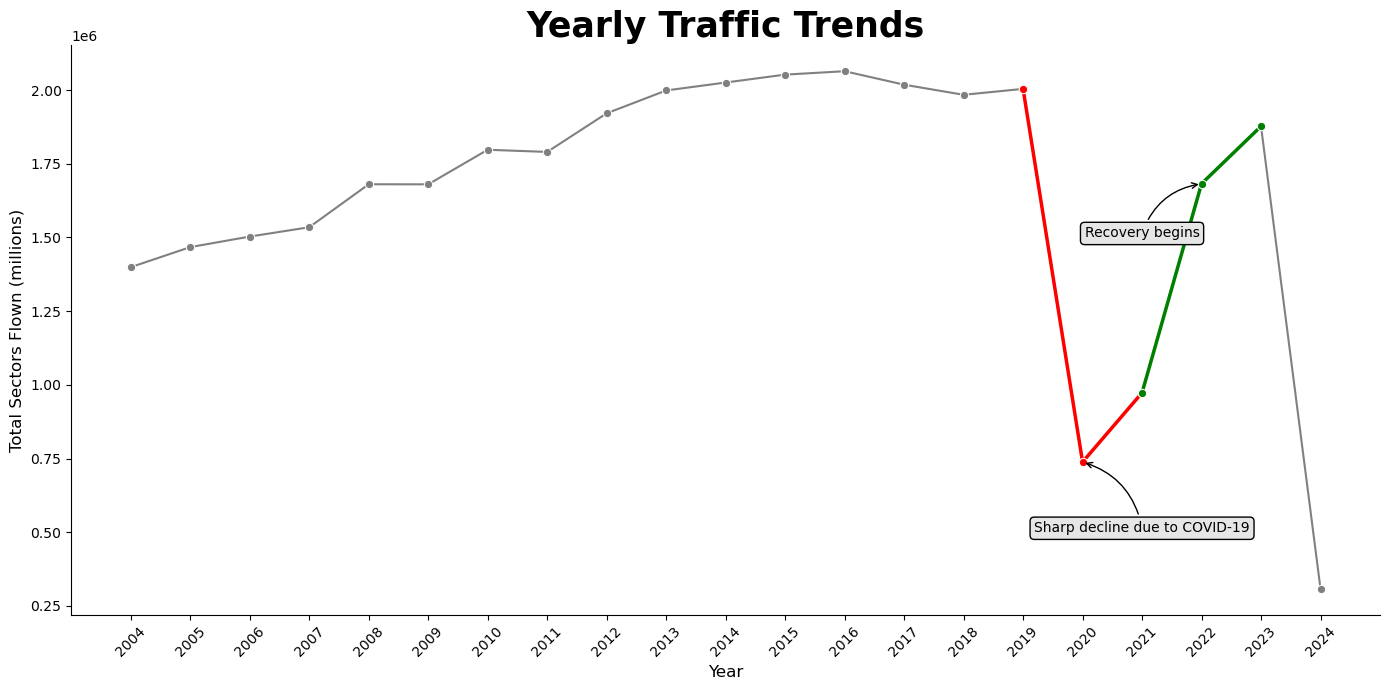

In [10]:
yearly_traffic = data.groupby('Year').agg({
    'Sectors_Flown': 'sum'
}).reset_index()

yearly_traffic['Year'] = yearly_traffic['Year'].astype(str)

plt.figure(figsize=(14, 7))
sns.lineplot(x='Year', y='Sectors_Flown', data=yearly_traffic, marker='o', color='grey', linewidth=1.5, linestyle='-')

drop_years = yearly_traffic[(yearly_traffic['Year'] >= '2019') & (yearly_traffic['Year'] <= '2021')]
recovery_years = yearly_traffic[(yearly_traffic['Year'] >= '2021') & (yearly_traffic['Year'] <= '2023')]
sns.lineplot(x='Year', y='Sectors_Flown', data=drop_years, marker='o', color='red', linewidth=2.5)
sns.lineplot(x='Year', y='Sectors_Flown', data=recovery_years, marker='o', color='green', linewidth=2.5)

# COVID-19 annotation
plt.annotate('Sharp decline due to COVID-19', xy=('2020', drop_years[drop_years['Year'] == '2020']['Sectors_Flown'].values[0]),
             xytext=('2021', 0.5e6),  # Adjusted to match desired area
             textcoords='data', ha='center', fontsize=10,
             bbox=dict(boxstyle="round,pad=0.3", fc="0.9"), 
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=.3', color='black'))

# Recovery begins annotation 
plt.annotate('Recovery begins', xy=('2022', recovery_years[recovery_years['Year'] == '2022']['Sectors_Flown'].values[0]),
             xytext=('2021', 1.5e6),  # New location as per the yellow highlight
             textcoords='data', ha='center', fontsize=10,
             bbox=dict(boxstyle="round,pad=0.3", fc="0.9"), 
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=-.3', color='black'))

plt.title('Yearly Traffic Trends', fontsize=25, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Sectors Flown (millions)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(False)
sns.despine()
plt.tight_layout()
plt.show()

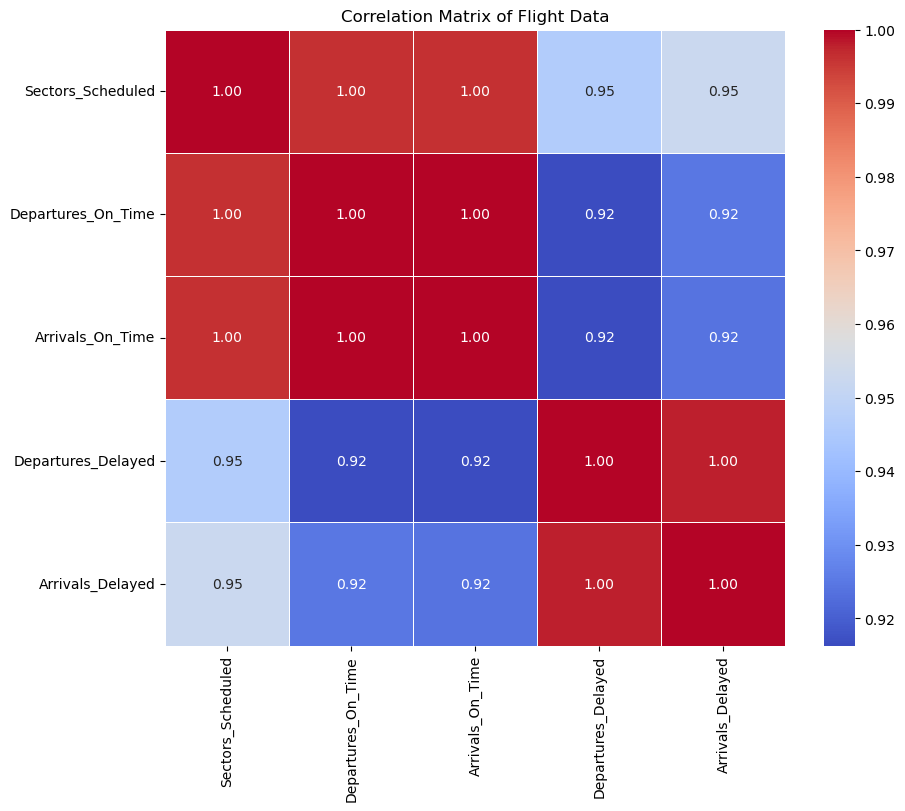

In [11]:
correlation_matrix = data[['Sectors_Scheduled', 'Departures_On_Time', 'Arrivals_On_Time', 'Departures_Delayed', 'Arrivals_Delayed']].corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Flight Data')
plt.show()

C:\Users\brito\AppData\Local\Temp\ipykernel_21420\352132269.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Delay_Rate', y='Route', data=route_delays, palette=colors)


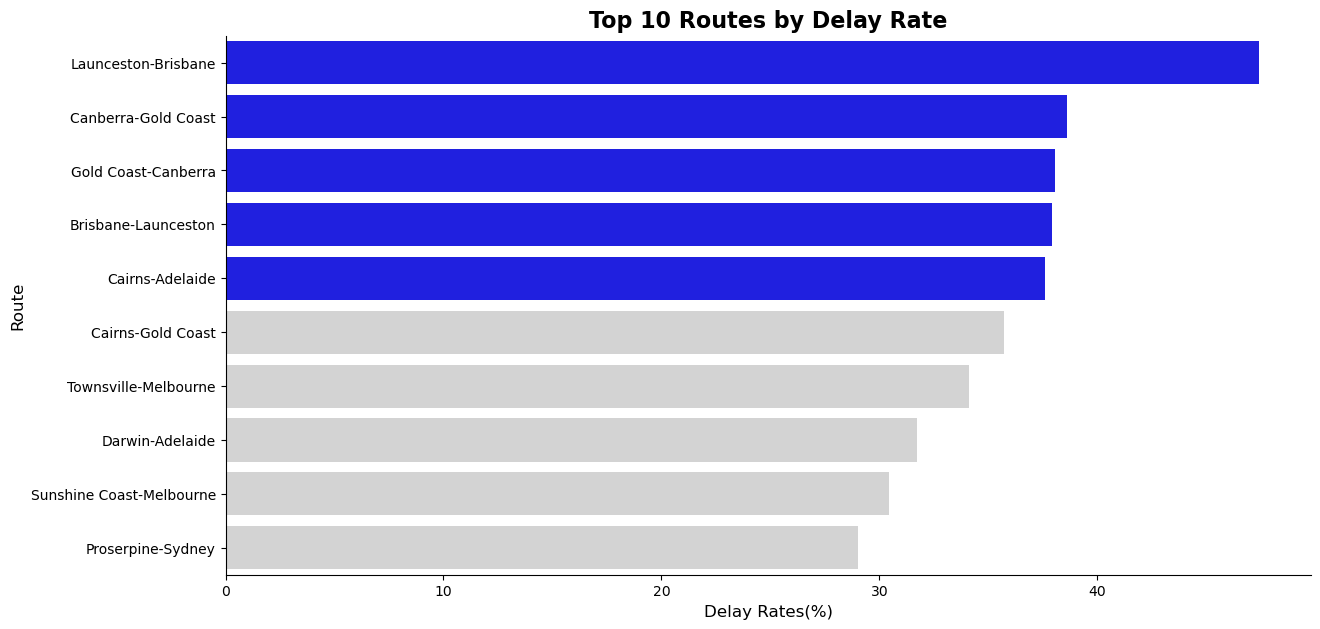

In [12]:
data['Delay_Rate'] = data['Departures_Delayed'] / data['Sectors_Flown'] * 100
route_delays = data.groupby('Route').agg({'Delay_Rate': 'mean'}).reset_index()

route_delays = route_delays.sort_values('Delay_Rate', ascending=False).head(10)

plt.figure(figsize=(14, 7))
colors = ['blue' if i < 5 else 'lightgrey' for i in range(len(route_delays))]

bar_plot = sns.barplot(x='Delay_Rate', y='Route', data=route_delays, palette=colors)

plt.title('Top 10 Routes by Delay Rate', fontsize=16, fontweight='bold')
plt.xlabel('Delay Rates(%)', fontsize=12)
plt.ylabel('Route', fontsize=12)
sns.despine()
plt.show()

In [13]:
data['Airline'] = data['Airline'].str.upper()
df_grouped = data.groupby('Airline').sum().reset_index()

C:\Users\brito\AppData\Local\Temp\ipykernel_21420\2399601732.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(x='Delay_Rate', y='Airline', data=airline_performance, palette=colors)


Text(0, 0.5, 'Airline')

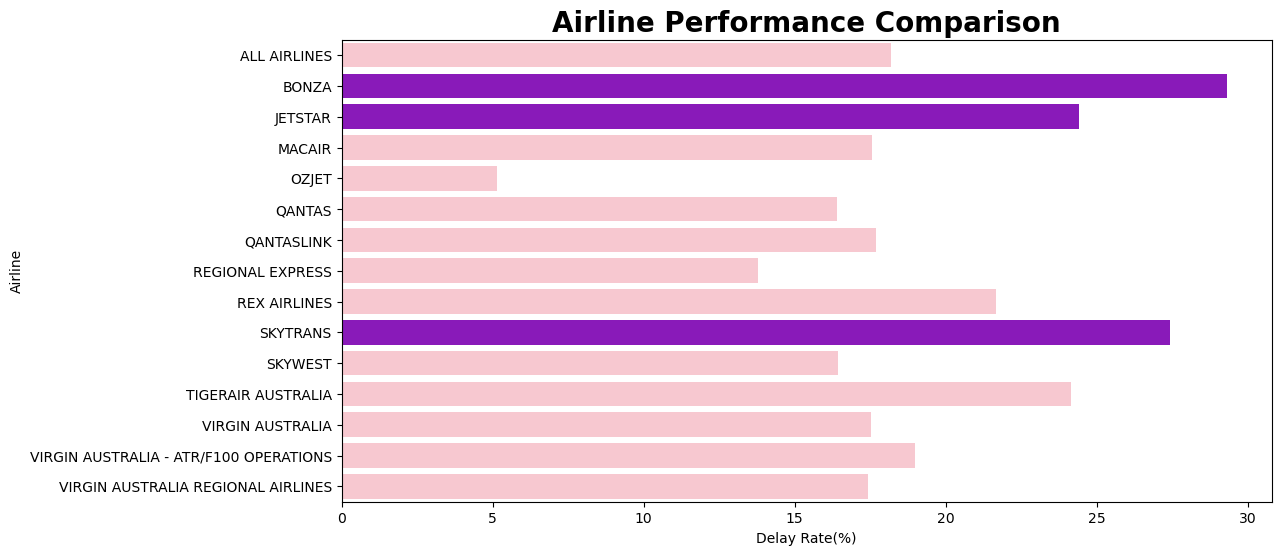

In [14]:
airline_performance = data.groupby('Airline').agg({
    'Departures_Delayed': 'sum',
    'Sectors_Flown': 'sum'
}).reset_index()
airline_performance['Delay_Rate'] = airline_performance['Departures_Delayed'] / airline_performance['Sectors_Flown'] * 100

top_3 = airline_performance.nlargest(3, 'Delay_Rate')['Airline'].tolist()

colors = ['darkviolet' if airline in top_3 else 'pink' for airline in airline_performance['Airline']]

plt.figure(figsize=(12, 6))
bar = sns.barplot(x='Delay_Rate', y='Airline', data=airline_performance, palette=colors)
plt.title('Airline Performance Comparison', fontweight='bold', fontsize=20)
plt.xlabel('Delay Rate(%)')
plt.ylabel('Airline')

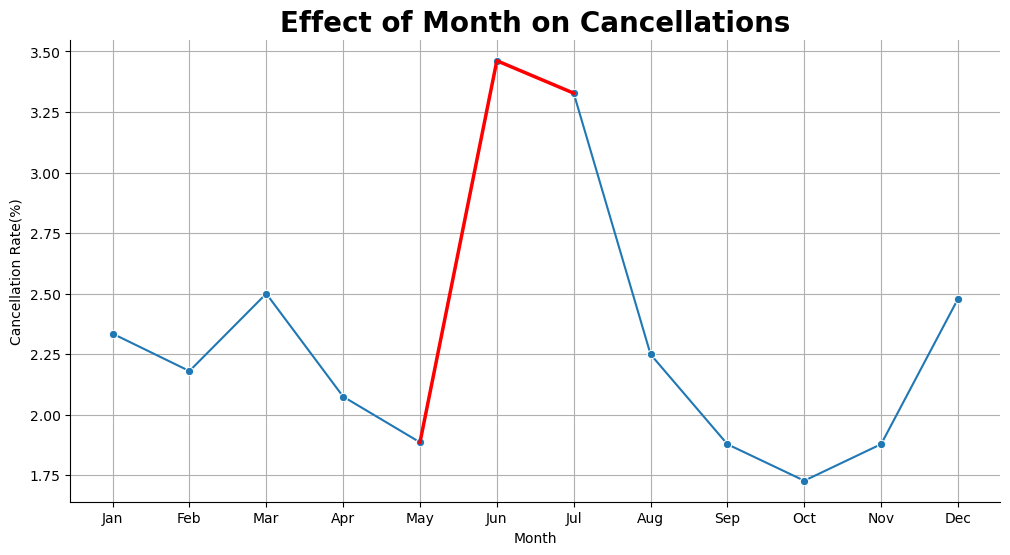

In [15]:
monthly_cancellations = data.groupby('Month_Num').agg({
    'Cancellations': 'sum',
    'Sectors_Scheduled': 'sum'
}).reset_index()

# Calculate the cancellation rate
monthly_cancellations['Cancellation_Rate'] = monthly_cancellations['Cancellations'] / monthly_cancellations['Sectors_Scheduled'] * 100

month_names = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
               7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
monthly_cancellations['Month'] = monthly_cancellations['Month_Num'].map(month_names)

# Create the line plot
plt.figure(figsize=(12, 6))
lineplot = sns.lineplot(data=monthly_cancellations, x='Month', y='Cancellation_Rate', marker='o')

# Highlight the increase segment (assuming the increase is from May to August, you might need to adjust this)
plt.plot(monthly_cancellations['Month'][4:7], monthly_cancellations['Cancellation_Rate'][4:7], color='red', linewidth=2.5)

plt.title('Effect of Month on Cancellations', fontweight='bold', fontsize=20)
plt.xlabel('Month')
plt.ylabel('Cancellation Rate(%)')
plt.grid(True)
sns.despine()
plt.show()

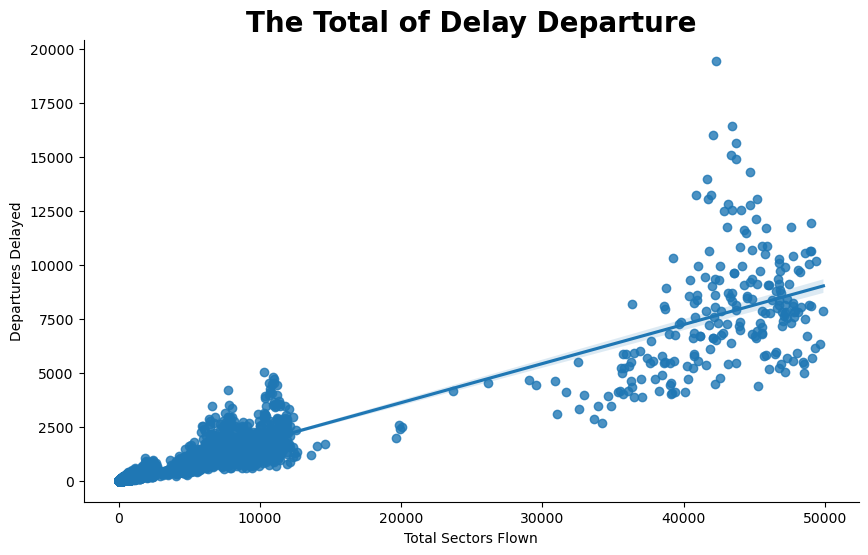

In [16]:
plt.figure(figsize=(10, 6))
sns.regplot(data=data, x='Sectors_Flown', y='Departures_Delayed')
plt.title('The Total of Delay Departure',fontsize=20,fontweight='bold')
plt.xlabel('Total Sectors Flown')
plt.ylabel('Departures Delayed')
sns.despine()
plt.show()

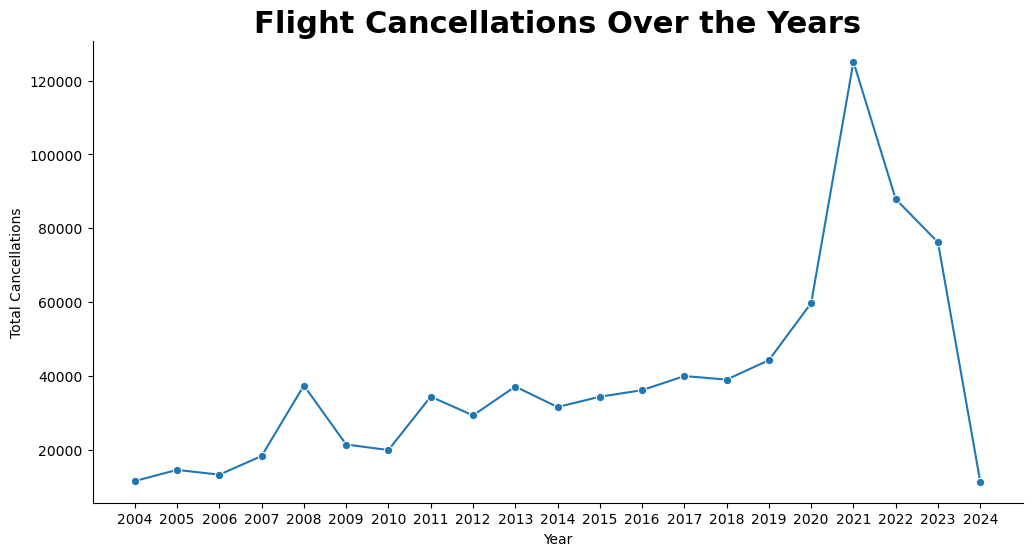

In [17]:
annual_cancellations = data.groupby('Year').agg({'Cancellations': 'sum'}).reset_index()
annual_cancellations['Year'] = yearly_traffic['Year'].astype(str)

plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Cancellations', data=annual_cancellations, marker='o')
plt.title('Flight Cancellations Over the Years', fontweight='bold', fontsize=22)
plt.xlabel('Year')
plt.ylabel('Total Cancellations')
sns.despine()
plt.show()

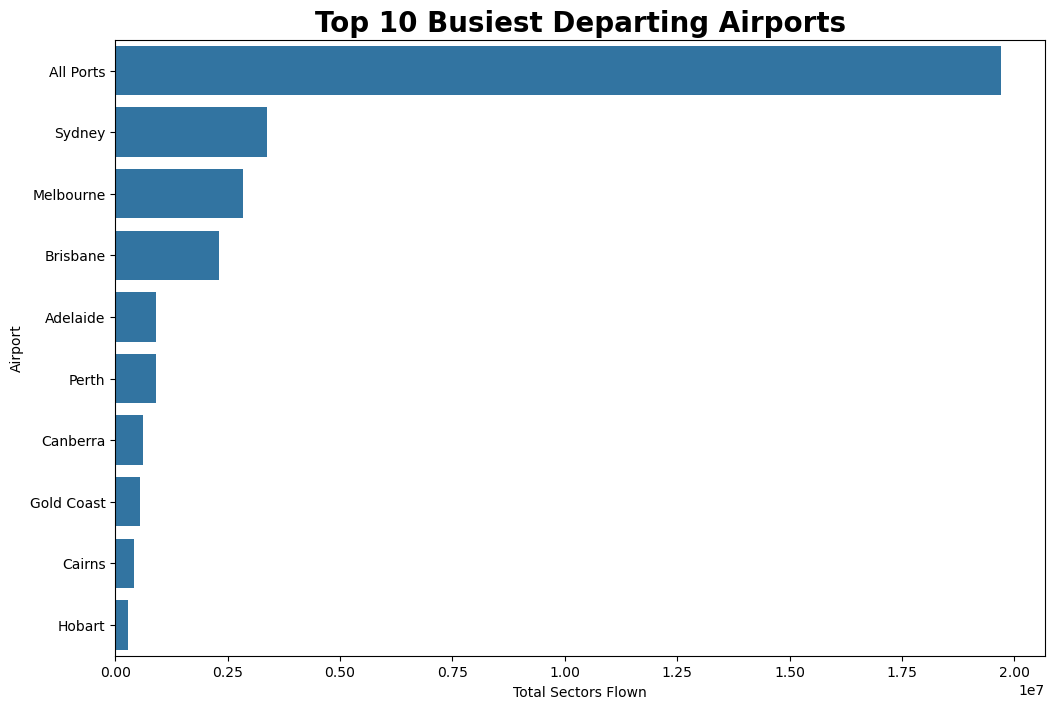

In [18]:
airport_load = data.groupby('Departing_Port').agg({
    'Sectors_Flown': 'sum'
}).reset_index()

plt.figure(figsize=(12, 8))
airport_load = airport_load.sort_values('Sectors_Flown', ascending=False)
sns.barplot(x='Sectors_Flown', y='Departing_Port', data=airport_load.head(10))
plt.title('Top 10 Busiest Departing Airports',fontweight='bold',fontsize=20)
plt.xlabel('Total Sectors Flown')
plt.ylabel('Airport')
plt.show()

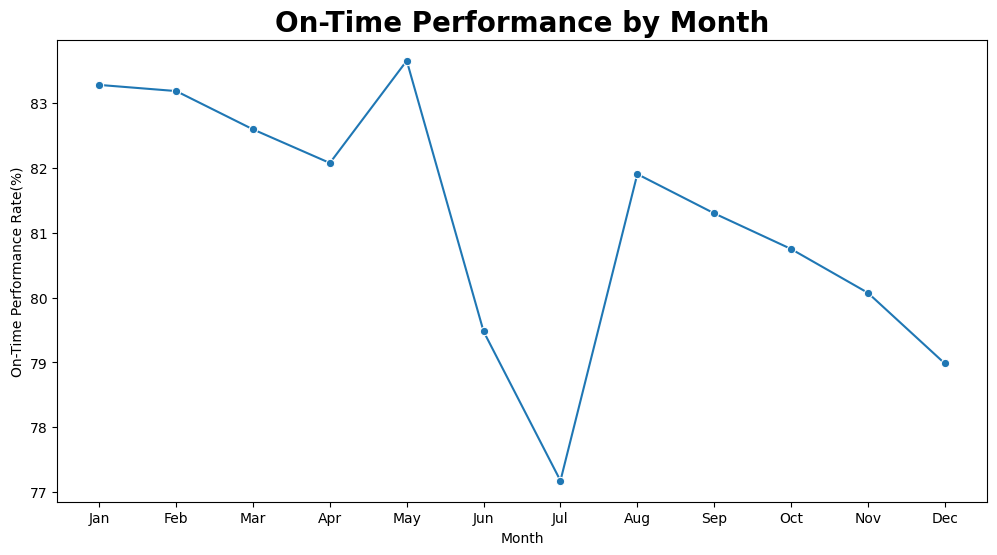

In [19]:
data['On_Time_Performance'] = data['Departures_On_Time'] / data['Sectors_Flown'] * 100
monthly_performance = data.groupby('Month_Num').agg({'On_Time_Performance': 'mean'}).reset_index()
month_names = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
               7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
monthly_performance['Month'] = monthly_performance['Month_Num'].map(month_names)


plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='On_Time_Performance', data=monthly_performance, marker='o')
plt.title('On-Time Performance by Month',fontweight='bold',fontsize=20)
plt.xlabel('Month')
plt.ylabel('On-Time Performance Rate(%)')
plt.show()

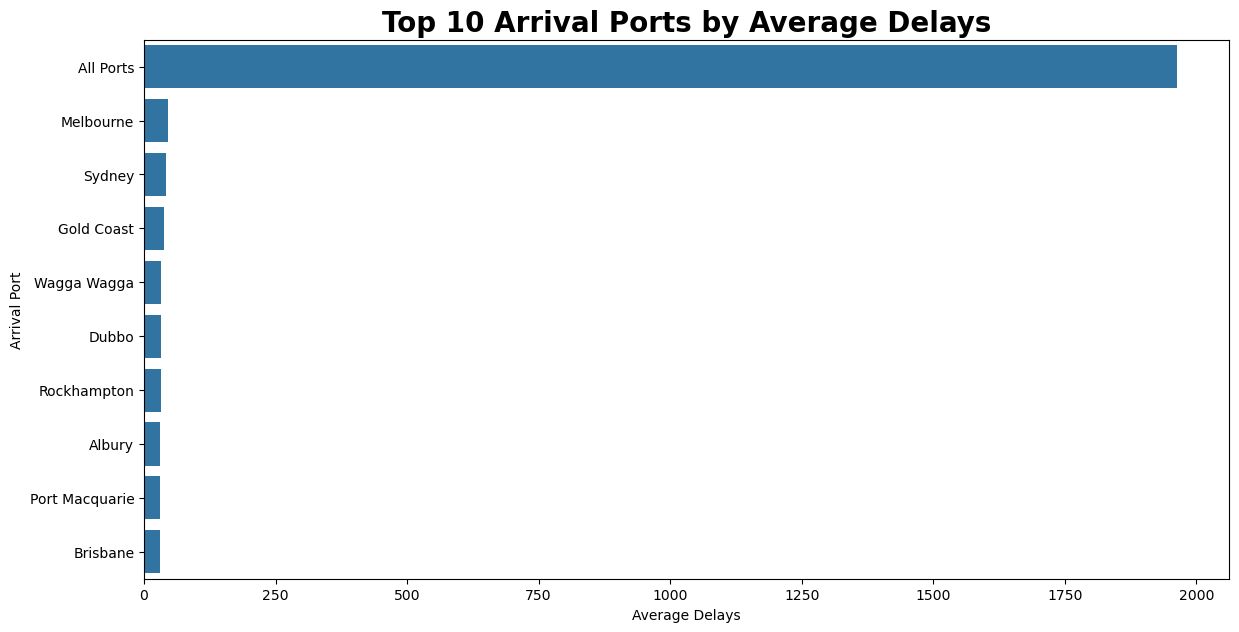

In [20]:
arrival_delays = data.groupby('Arriving_Port').agg({
    'Arrivals_Delayed': 'mean'
}).reset_index()

plt.figure(figsize=(14, 7))
sns.barplot(x='Arrivals_Delayed', y='Arriving_Port', data=arrival_delays.sort_values('Arrivals_Delayed', ascending=False).head(10))
plt.title('Top 10 Arrival Ports by Average Delays',fontweight='bold',fontsize=20)
plt.xlabel('Average Delays')
plt.ylabel('Arrival Port')
plt.show()

C:\Users\brito\AppData\Local\Temp\ipykernel_21420\3098322443.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Departures_Delayed', y='Airline', data=average_delays, palette=colors)


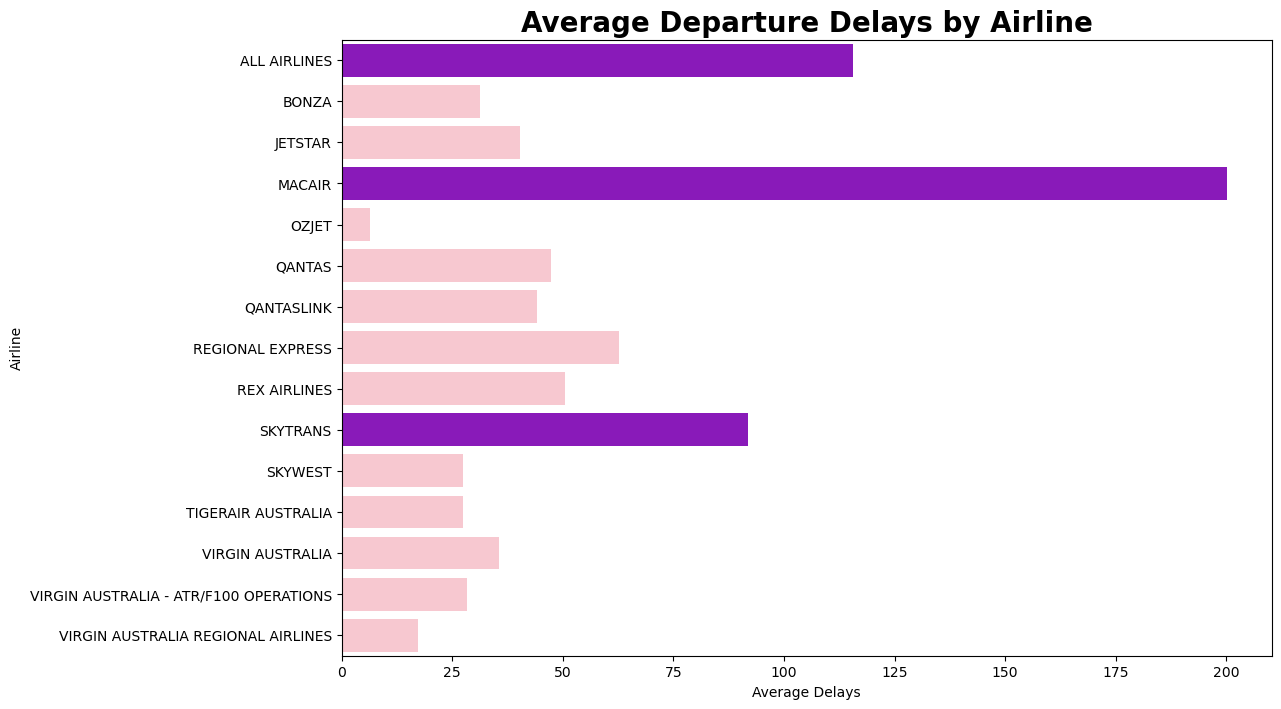

In [23]:
average_delays = data.groupby('Airline').agg({
    'Departures_Delayed': 'mean'
}).reset_index()

top_3 = average_delays.nlargest(3, 'Departures_Delayed')['Airline'].tolist()

colors = ['darkviolet' if airline in top_3 else 'pink' for airline in average_delays['Airline']]

plt.figure(figsize=(12, 8))
sns.barplot(x='Departures_Delayed', y='Airline', data=average_delays, palette=colors)
plt.title('Average Departure Delays by Airline',fontweight='bold',fontsize=20)
plt.xlabel('Average Delays')
plt.ylabel('Airline')
plt.show()


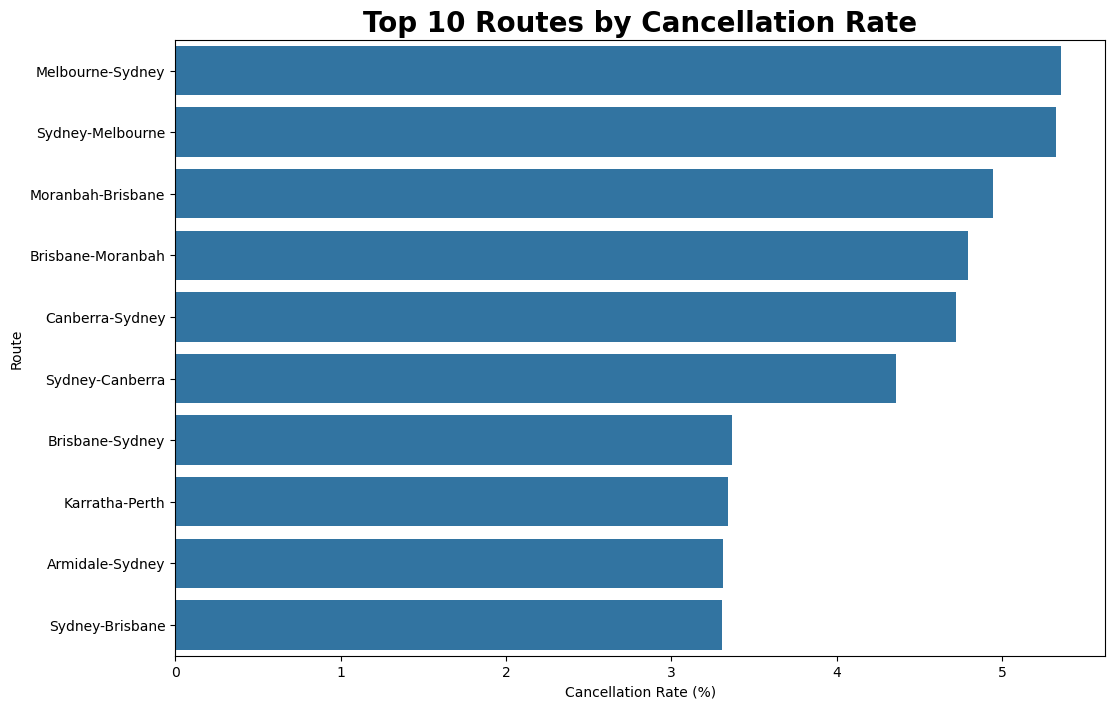

In [24]:
cancellation_rates = data.groupby('Route').agg({
    'Cancellations': 'sum',
    'Sectors_Scheduled': 'sum'
}).reset_index()
cancellation_rates['Cancellation_Rate'] = cancellation_rates['Cancellations'] / cancellation_rates['Sectors_Scheduled'] *100

plt.figure(figsize=(12, 8))
top_cancellation_rates = cancellation_rates.sort_values(by='Cancellation_Rate', ascending=False).head(10)
sns.barplot(x='Cancellation_Rate', y='Route', data=top_cancellation_rates)
plt.title('Top 10 Routes by Cancellation Rate',fontweight='bold',fontsize=20)
plt.xlabel('Cancellation Rate (%)')
plt.ylabel('Route')
plt.show()

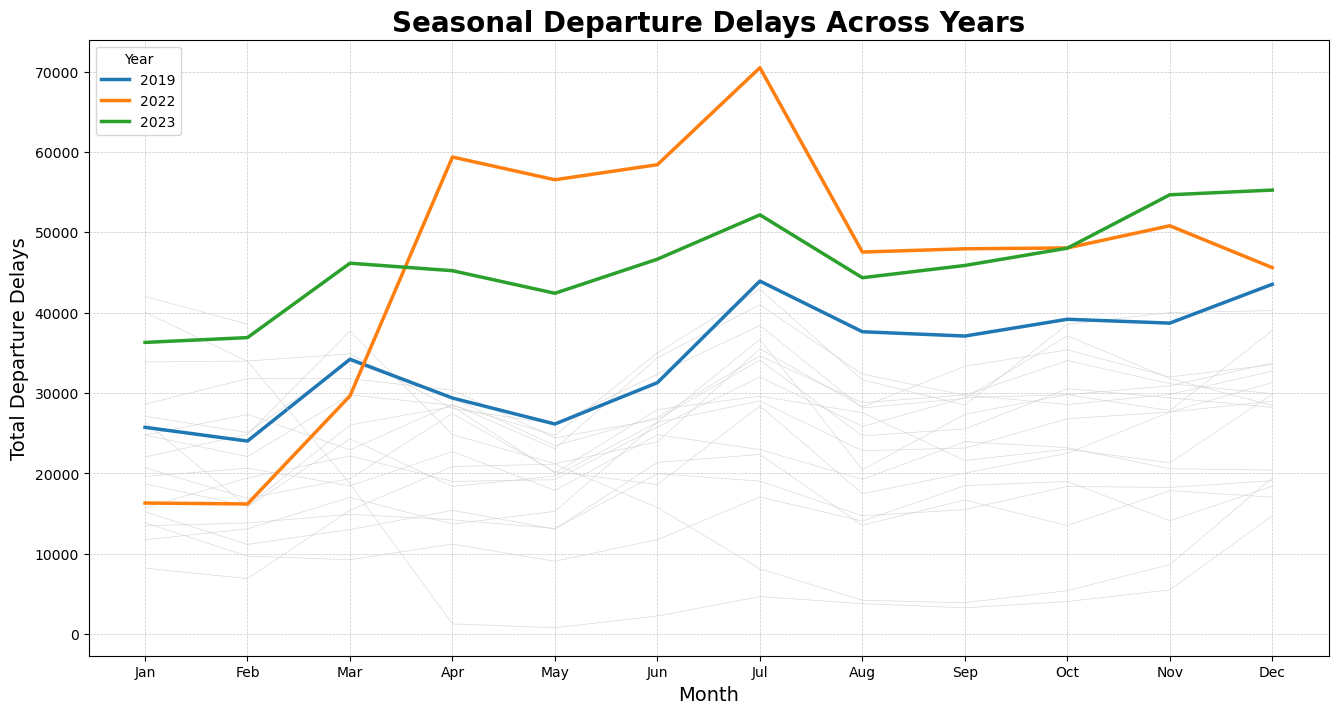

In [25]:
seasonal_delays = data.groupby(['Year', 'Month_Num']).agg({'Departures_Delayed': 'sum'}).reset_index()

month_names = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
               7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
seasonal_delays['Month'] = seasonal_delays['Month_Num'].map(month_names)

peak_delays = seasonal_delays.groupby('Year')['Departures_Delayed'].max().nlargest(3)
highlight_years = peak_delays.index.tolist()

plt.figure(figsize=(16, 8))


base_color = (0.8, 0.8, 0.8, 0.7)

for year in seasonal_delays['Year'].unique():
    year_data = seasonal_delays[seasonal_delays['Year'] == year]
    if year in highlight_years:
        sns.lineplot(data=year_data, x='Month', y='Departures_Delayed', linewidth=2.5, label=year)
    else:
        sns.lineplot(data=year_data, x='Month', y='Departures_Delayed', color=base_color, linewidth=0.5, label='_nolegend_')

plt.title('Seasonal Departure Delays Across Years', fontweight='bold', fontsize=20)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Departure Delays', fontsize=14)

plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

plt.legend(title='Year', loc='upper left')

plt.show()

C:\Users\brito\AppData\Local\Temp\ipykernel_21420\1335126643.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=on_time_performance, x='Year', y='OTP_Rate', marker='o', ci=None)


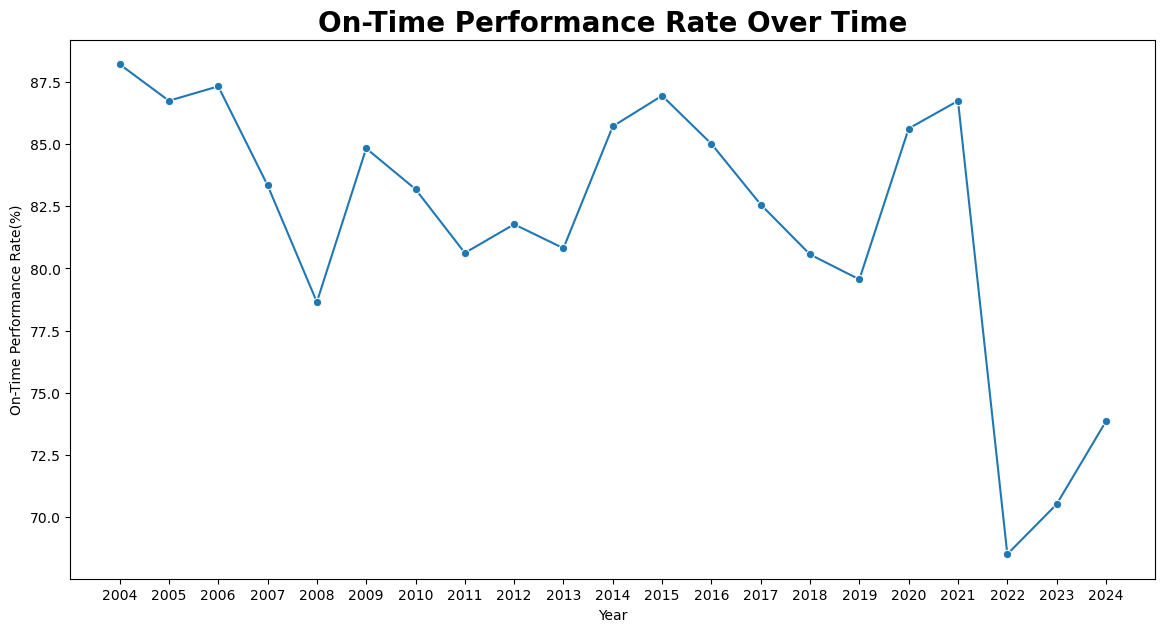

In [26]:
on_time_performance = data.groupby(['Year', 'Month_Num']).agg({
    'Departures_On_Time': 'sum',
    'Sectors_Flown': 'sum'
}).reset_index()
on_time_performance['OTP_Rate'] = on_time_performance['Departures_On_Time'] / on_time_performance['Sectors_Flown'] * 100
on_time_performance['Year'] = on_time_performance['Year'].astype(str)

plt.figure(figsize=(14, 7))
sns.lineplot(data=on_time_performance, x='Year', y='OTP_Rate', marker='o', ci=None)
plt.title('On-Time Performance Rate Over Time', fontweight='bold', fontsize=20)
plt.xlabel('Year')
plt.ylabel('On-Time Performance Rate(%)')
plt.show()

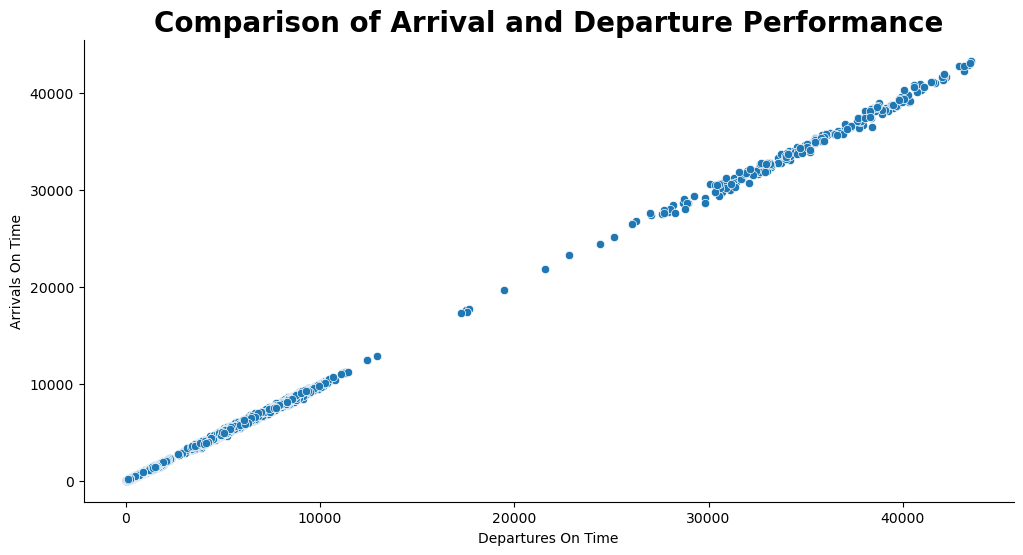

In [27]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='Departures_On_Time', y='Arrivals_On_Time')
plt.title('Comparison of Arrival and Departure Performance',fontweight='bold',fontsize=20)
plt.xlabel('Departures On Time')
plt.ylabel('Arrivals On Time')
sns.despine()
plt.show()

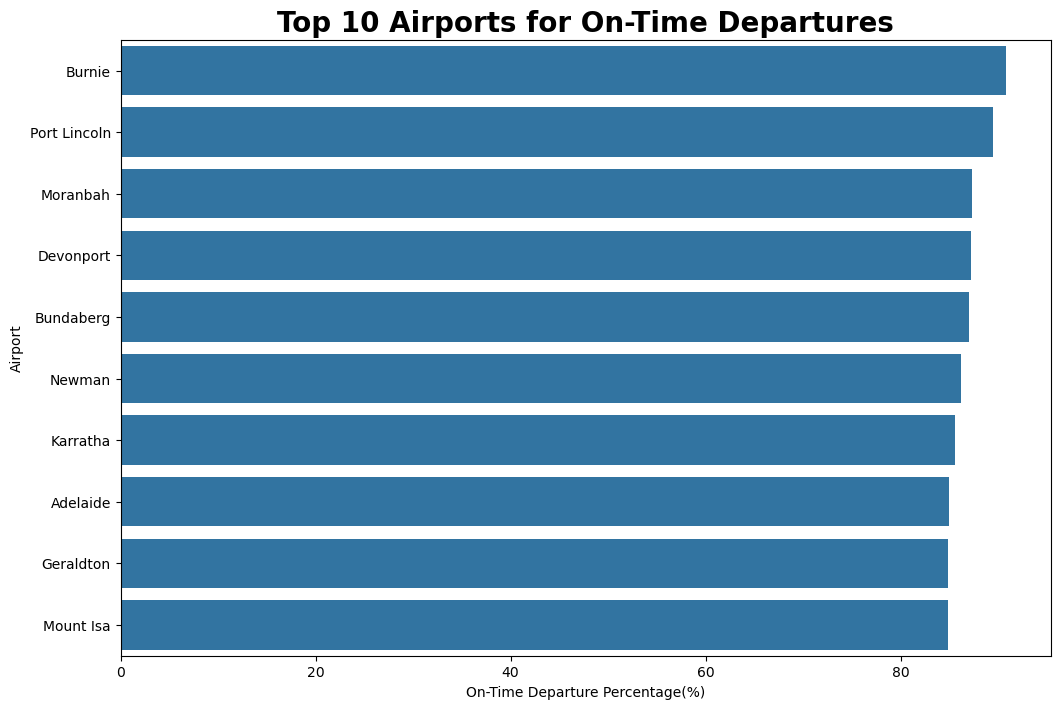

In [28]:
top_on_time_airports = data.groupby('Departing_Port').agg({
    'Departures_On_Time': 'sum',
    'Sectors_Flown': 'sum'
}).reset_index()
top_on_time_airports['On_Time_Percentage'] = top_on_time_airports['Departures_On_Time'] / top_on_time_airports['Sectors_Flown'] * 100

plt.figure(figsize=(12, 8))
top_airports = top_on_time_airports.sort_values('On_Time_Percentage', ascending=False).head(10)
sns.barplot(x='On_Time_Percentage', y='Departing_Port', data=top_airports)
plt.title('Top 10 Airports for On-Time Departures',fontweight='bold',fontsize=20)
plt.xlabel('On-Time Departure Percentage(%)')
plt.ylabel('Airport')
plt.show()

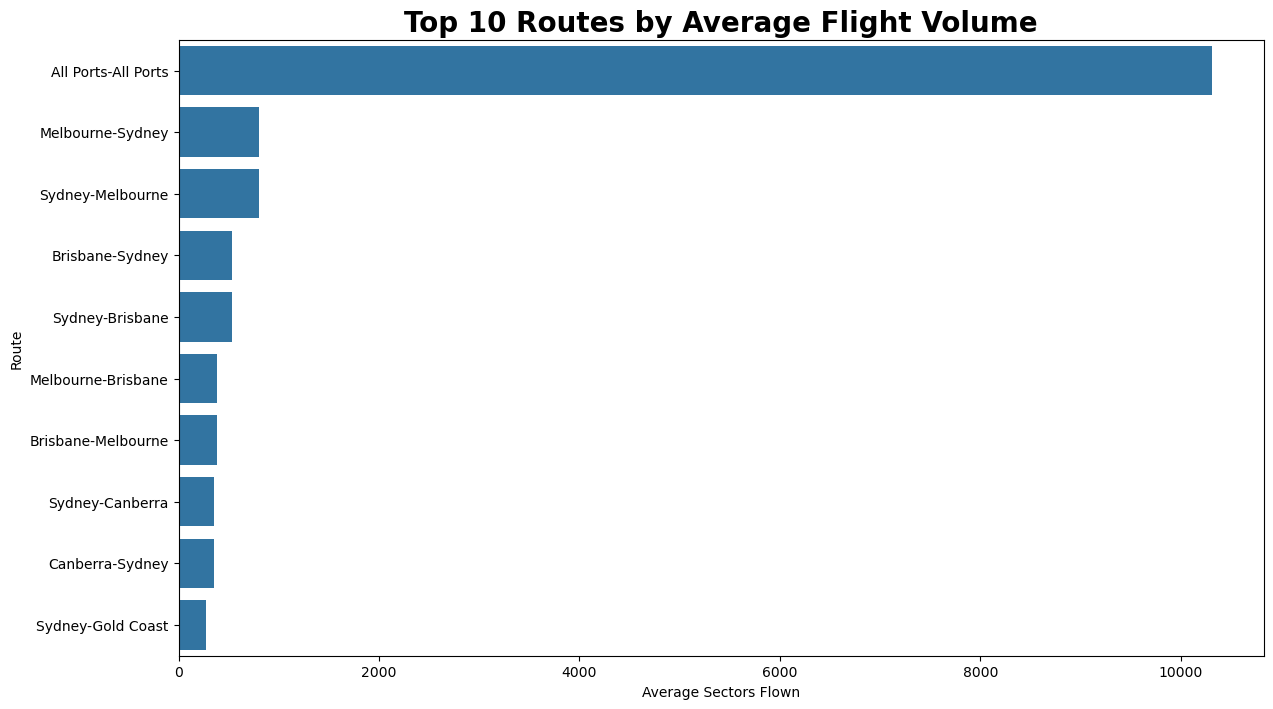

In [29]:
route_volume = data.groupby('Route').agg({'Sectors_Flown': 'mean'}).reset_index()

plt.figure(figsize=(14, 8))
top_routes = route_volume.sort_values('Sectors_Flown', ascending=False).head(10)
sns.barplot(x='Sectors_Flown', y='Route', data=top_routes)
plt.title('Top 10 Routes by Average Flight Volume',fontweight='bold',fontsize=20)
plt.xlabel('Average Sectors Flown')
plt.ylabel('Route')
plt.show()

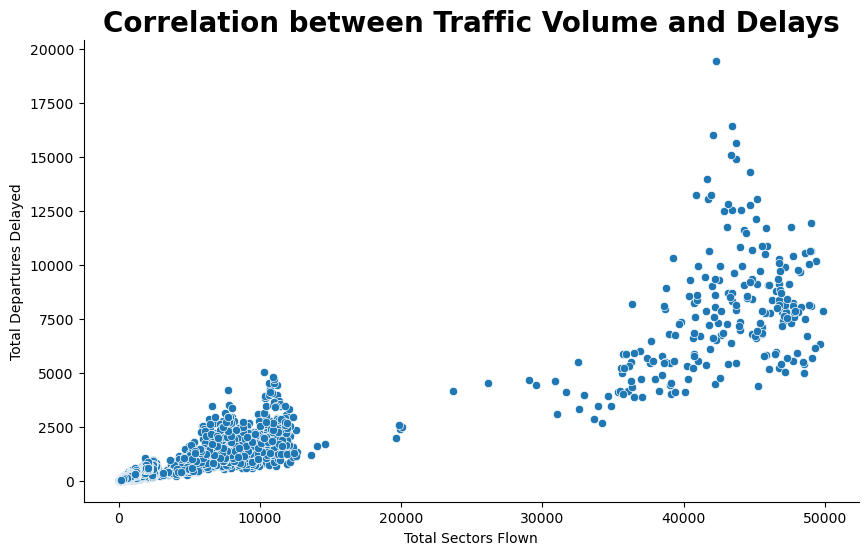

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sectors_Flown', y='Departures_Delayed', data=data)
plt.title('Correlation between Traffic Volume and Delays',fontweight='bold',fontsize=20)
plt.xlabel('Total Sectors Flown')
plt.ylabel('Total Departures Delayed')
sns.despine()
plt.show()

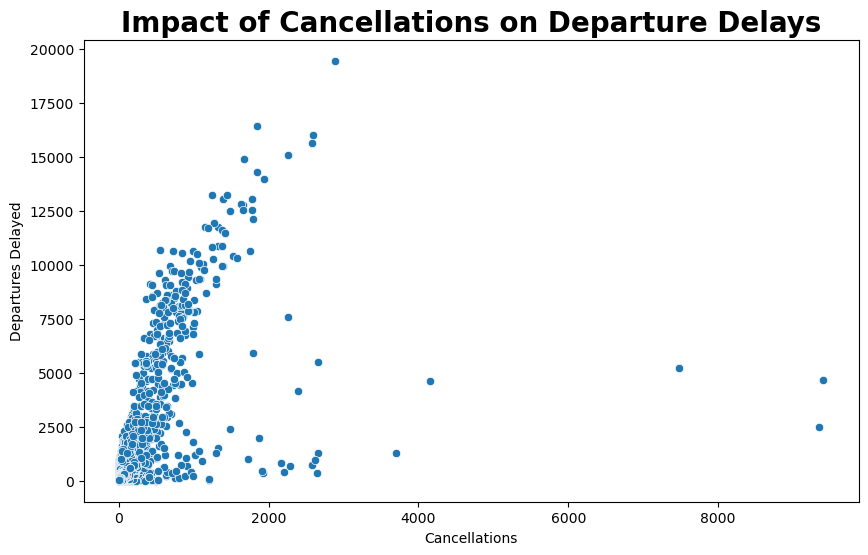

In [31]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Cancellations', y='Departures_Delayed', data=data)
plt.title('Impact of Cancellations on Departure Delays',fontweight='bold',fontsize=20)
plt.xlabel('Cancellations')
plt.ylabel('Departures Delayed')
plt.show()

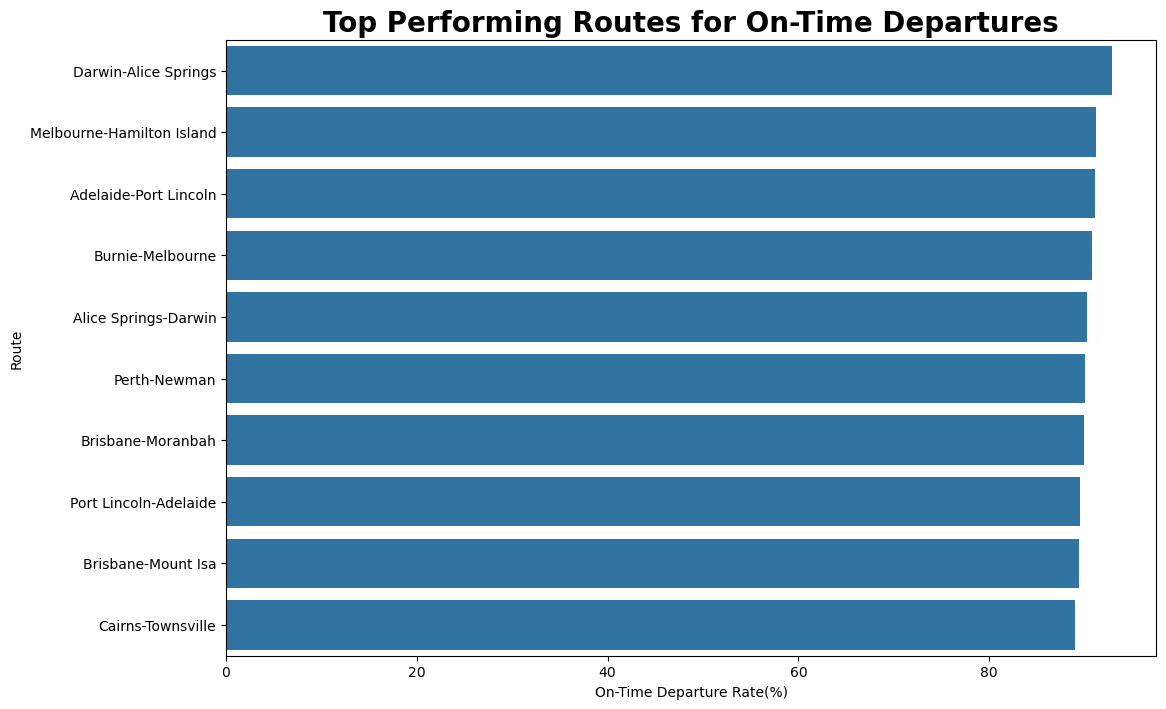

In [32]:
on_time_routes = data.groupby('Route').agg({
    'Departures_On_Time': 'sum',
    'Sectors_Flown': 'sum'
}).reset_index()
on_time_routes['OTP_Rate'] = on_time_routes['Departures_On_Time'] / on_time_routes['Sectors_Flown'] *100

plt.figure(figsize=(12, 8))
best_routes = on_time_routes.sort_values('OTP_Rate', ascending=False).head(10)
sns.barplot(x='OTP_Rate', y='Route', data=best_routes)
plt.title('Top Performing Routes for On-Time Departures',fontweight='bold',fontsize=20)
plt.xlabel('On-Time Departure Rate(%)')
plt.ylabel('Route')
plt.show()

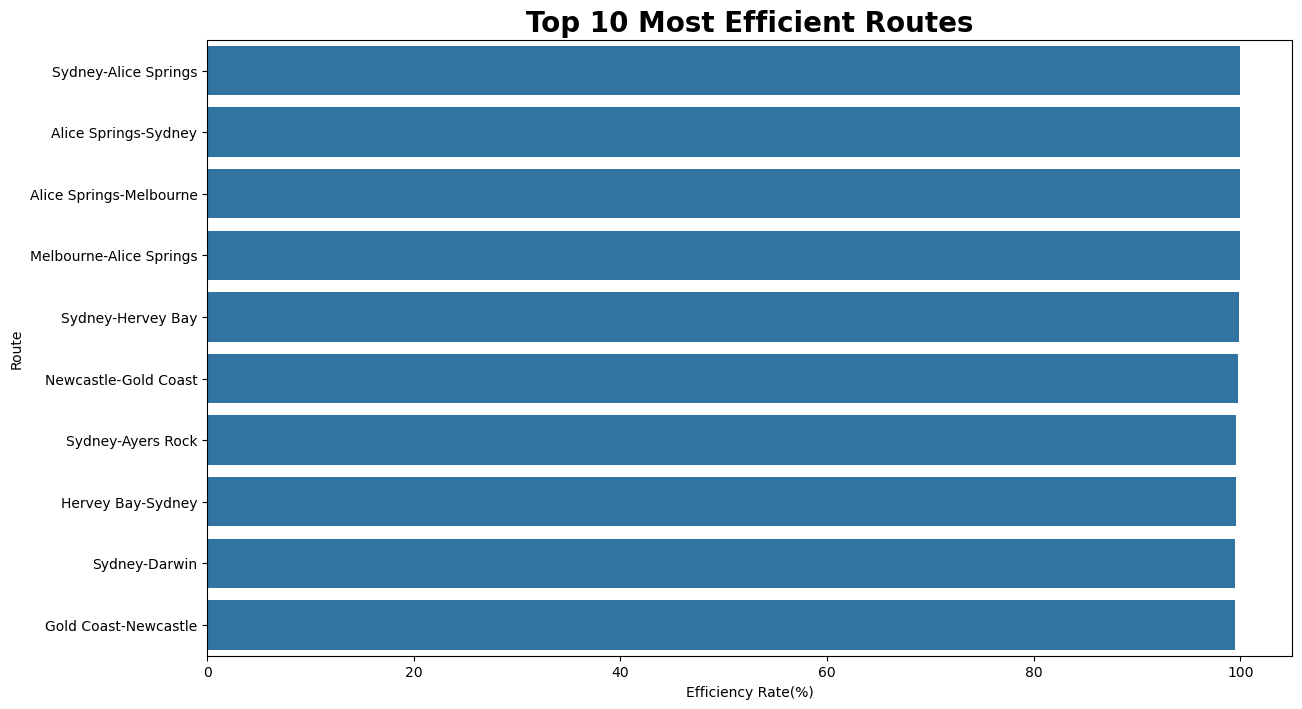

In [33]:
route_efficiency = data.groupby('Route').agg({
    'Sectors_Scheduled': 'sum',
    'Sectors_Flown': 'sum'
}).reset_index()
route_efficiency['Efficiency_Rate'] = route_efficiency['Sectors_Flown'] / route_efficiency['Sectors_Scheduled']*100

plt.figure(figsize=(14, 8))
top_efficient_routes = route_efficiency.sort_values('Efficiency_Rate', ascending=False).head(10)
sns.barplot(x='Efficiency_Rate', y='Route', data=top_efficient_routes)
plt.title('Top 10 Most Efficient Routes',fontweight='bold',fontsize=20)
plt.xlabel('Efficiency Rate(%)')
plt.ylabel('Route')
plt.show()

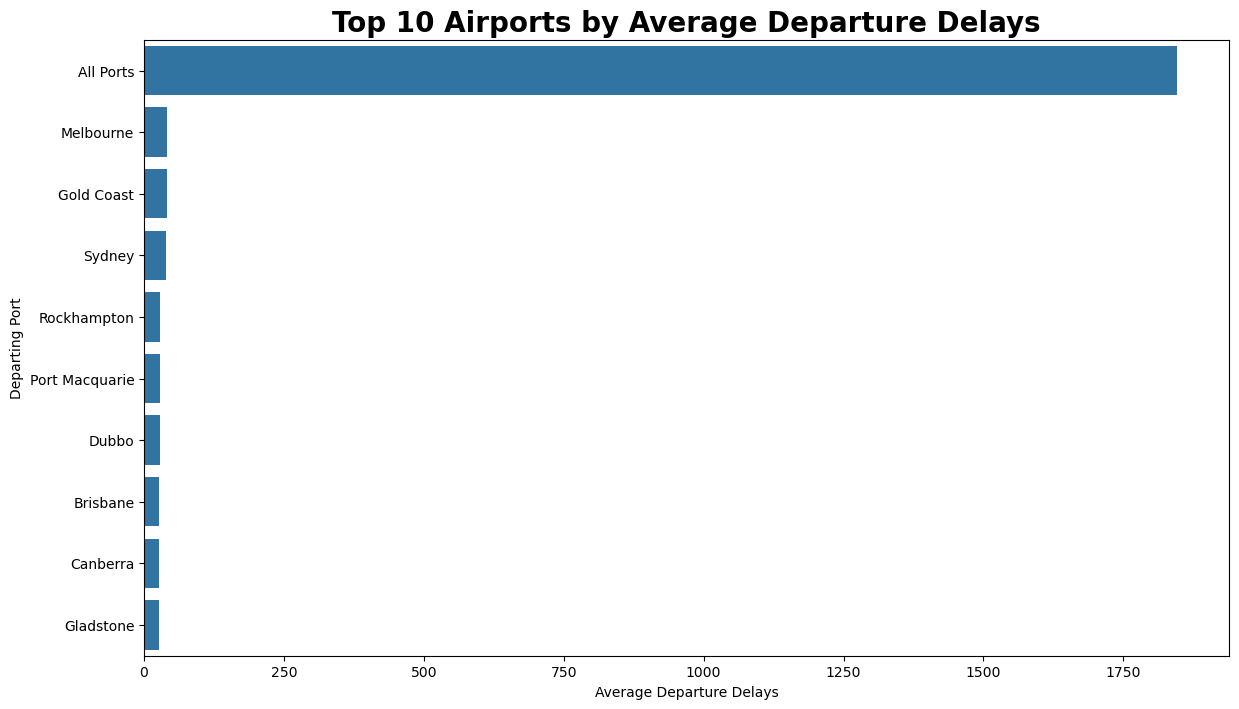

In [34]:
port_delays = data.groupby('Departing_Port').agg({'Departures_Delayed': 'mean'}).reset_index()

plt.figure(figsize=(14, 8))
top_delay_ports = port_delays.sort_values('Departures_Delayed', ascending=False).head(10)
sns.barplot(x='Departures_Delayed', y='Departing_Port', data=top_delay_ports)
plt.title('Top 10 Airports by Average Departure Delays',fontweight='bold',fontsize=20)
plt.xlabel('Average Departure Delays')
plt.ylabel('Departing Port')
plt.show()